In [63]:
pip install tweet-preprocessor

In [64]:


from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os
import time
from datetime import datetime, date, timedelta
import warnings

import preprocessor as p

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from textblob import TextBlob
from wordcloud import WordCloud
warnings.filterwarnings('ignore')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [66]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets for ML/256/Group_Project/vaccination_all_tweets.csv')



In [67]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [68]:
tweets_df_final = df[['user_name', 'user_location', 'user_description',
                             'date', 'text', 'hashtags']]

In [69]:
tweets_df_final.head(10)

,user_name,user_location,user_description,date,text,hashtags
0,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech']
1,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN
2,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf..."
3,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN
4,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']"
5,Dee,"Birmingham, England","Gastroenterology trainee, Clinical Research Fe...",2020-12-12 20:11:42,Does anyone have any useful advice/guidance fo...,NaN
6,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,['vaccination']
7,Dr.Krutika Kuppalli,NaN,"ID, Global Health, VHF, Pandemic Prep, Emergin...",2020-12-12 20:04:29,There have not been many bright days in 2020 b...,"['BidenHarris', 'Election2020']"
8,Erin Despas,NaN,Designing&selling on Teespring. Like 90s Disne...,2020-12-12 20:01:16,Covid vaccine; You getting it?\n\n #CovidVacci...,"['CovidVaccine', 'covid19', 'PfizerBioNTech', ..."
9,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,2020-12-12 19:30:33,#CovidVaccine \n\nStates will start getting #C...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku..."


In [70]:
extract_datetime = datetime.today().strftime('%Y%m%d_%H%M%S')
tweets_df_final.drop_duplicates(inplace = True)

In [71]:
tweets_df = tweets_df_final.copy()
tweets_df['text_cleaned'] = tweets_df['text'].apply(lambda x: p.clean(x))
# tweets_df['user_description_cleaned'] = tweets_df['user_description'].apply(lambda x: p.clean(x))

In [72]:
tweets_df.drop_duplicates(subset='text_cleaned', keep="first", inplace = True)
tweets_df.head(10)


,user_name,user_location,user_description,date,text,hashtags,text_cleaned
0,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Same folks said daikon paste could treat a cyt...
1,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,While the world has been on the wrong side of ...
2,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Russian vaccine is created to last -4 years
3,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,"Facts are immutable, Senator, even when you're..."
4,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Explain to me again why we need a vaccine
5,Dee,"Birmingham, England","Gastroenterology trainee, Clinical Research Fe...",2020-12-12 20:11:42,Does anyone have any useful advice/guidance fo...,NaN,Does anyone have any useful advice/guidance fo...
6,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,['vaccination'],it is a bit sad to claim the fame for success ...
7,Dr.Krutika Kuppalli,NaN,"ID, Global Health, VHF, Pandemic Prep, Emergin...",2020-12-12 20:04:29,There have not been many bright days in 2020 b...,"['BidenHarris', 'Election2020']",There have not been many bright days in but he...
8,Erin Despas,NaN,Designing&selling on Teespring. Like 90s Disne...,2020-12-12 20:01:16,Covid vaccine; You getting it?\n\n #CovidVacci...,"['CovidVaccine', 'covid19', 'PfizerBioNTech', ...",Covid vaccine; You getting it?
9,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,2020-12-12 19:30:33,#CovidVaccine \n\nStates will start getting #C...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...","States will start getting Monday, says"


In [73]:
punct =['%','/',':','\\','&amp;','&',';']

def remove_punctuations(text):
    for punctuation in punct:
        text = text.replace(punctuation, '')
    return text

tweets_df['text_cleaned'] = tweets_df['text_cleaned'].apply(lambda x: remove_punctuations(x))


In [74]:
tweets_df['text_cleaned'].replace('', np.nan, inplace=True)
tweets_df['text_cleaned'].replace(' ', np.nan, inplace=True)
tweets_df.dropna(subset=['text_cleaned'], inplace=True)
len(tweets_df)

25812

In [75]:
tweets_df = tweets_df.reset_index(drop=True)
tweets_df.head(10)


,user_name,user_location,user_description,date,text,hashtags,text_cleaned
0,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Same folks said daikon paste could treat a cyt...
1,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,While the world has been on the wrong side of ...
2,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Russian vaccine is created to last -4 years
3,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,"Facts are immutable, Senator, even when you're..."
4,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Explain to me again why we need a vaccine
5,Dee,"Birmingham, England","Gastroenterology trainee, Clinical Research Fe...",2020-12-12 20:11:42,Does anyone have any useful advice/guidance fo...,NaN,Does anyone have any useful adviceguidance for...
6,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,['vaccination'],it is a bit sad to claim the fame for success ...
7,Dr.Krutika Kuppalli,NaN,"ID, Global Health, VHF, Pandemic Prep, Emergin...",2020-12-12 20:04:29,There have not been many bright days in 2020 b...,"['BidenHarris', 'Election2020']",There have not been many bright days in but he...
8,Erin Despas,NaN,Designing&selling on Teespring. Like 90s Disne...,2020-12-12 20:01:16,Covid vaccine; You getting it?\n\n #CovidVacci...,"['CovidVaccine', 'covid19', 'PfizerBioNTech', ...",Covid vaccine You getting it?
9,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,2020-12-12 19:30:33,#CovidVaccine \n\nStates will start getting #C...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...","States will start getting Monday, says"


In [76]:
def to_get_Subjectivity(text):

  subjectivity = TextBlob(text).sentiment.subjectivity

  return subjectivity

In [77]:
def to_get_Polarity(text):

  polarity = TextBlob(text).sentiment.polarity

  return polarity

In [78]:
def to_get_Analysis(polarity):

  if polarity > 0:

    return 'Positive'

  elif polarity == 0:

    return 'Neutral'

  elif polarity < 0:

    return 'Negative'

In [79]:
tweets_df['Subjectivity'] =tweets_df['text_cleaned'].apply(to_get_Subjectivity)
tweets_df['Polarity'] =tweets_df['text_cleaned'].apply(to_get_Polarity)
tweets_df['Analysis'] = tweets_df['Polarity'].apply(to_get_Analysis)

In [80]:
tweets_df.head()

,user_name,user_location,user_description,date,text,hashtags,text_cleaned,Subjectivity,Polarity,Analysis
0,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Same folks said daikon paste could treat a cyt...,0.125000,0.00,Neutral
1,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,While the world has been on the wrong side of ...,0.900000,-0.50,Negative
2,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Russian vaccine is created to last -4 years,0.033333,0.00,Neutral
3,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,"Facts are immutable, Senator, even when you're...",0.550000,-0.05,Negative
4,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Explain to me again why we need a vaccine,0.000000,0.00,Neutral


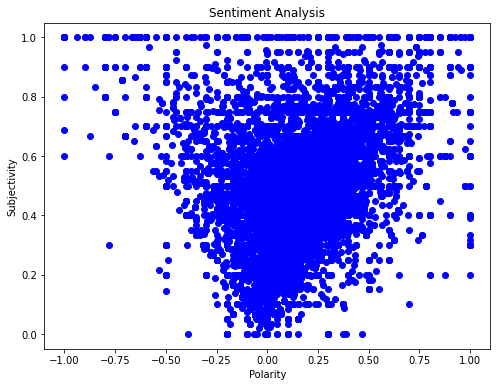

In [81]:
plt.figure(figsize=(8,6)) 
plt.scatter(tweets_df["Polarity"],tweets_df["Subjectivity"],color='Blue')   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [82]:
tweets_df['Analysis'].value_counts()

Neutral     12182
Positive    10725
Negative     2905
Name: Analysis, dtype: int64

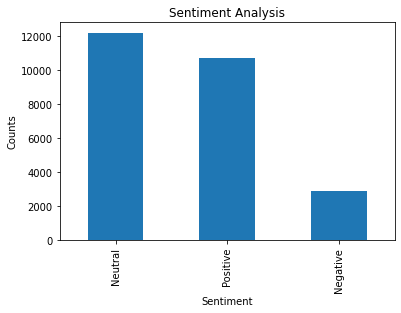

In [83]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
tweets_df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()


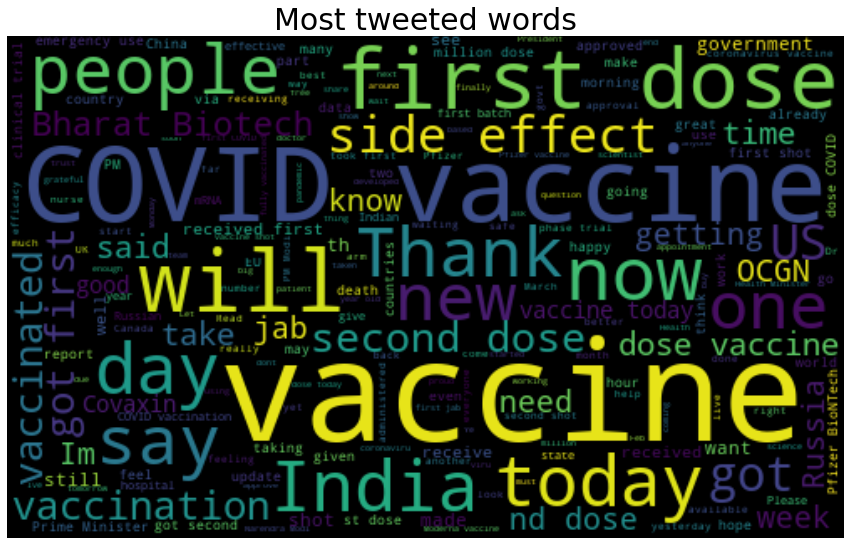

In [84]:
allWords = ' '.join([twts for twts in tweets_df['text_cleaned']])
wordCloud = WordCloud(width=500, height=300, random_state=21).generate(allWords)

plt.figure(figsize=(15, 15))
plt.title('Most tweeted words', fontsize = 30)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [85]:
!pip install vaderSentiment

In [164]:
dfvader = tweets_df[['text_cleaned','hashtags','date']]

In [165]:
dfvader.head()

,text_cleaned,hashtags,date
0,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],2020-12-20 06:06:44
1,While the world has been on the wrong side of ...,NaN,2020-12-13 16:27:13
2,Russian vaccine is created to last -4 years,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",2020-12-12 20:33:45
3,"Facts are immutable, Senator, even when you're...",NaN,2020-12-12 20:23:59
4,Explain to me again why we need a vaccine,"['whereareallthesickpeople', 'PfizerBioNTech']",2020-12-12 20:17:19


In [166]:
import nltk
nltk.download('vader_lexicon')
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [167]:
SIA = SentimentIntensityAnalyzer()

In [168]:
scores = []

compound_list = []
positive_list = []
negative_list = []
neutral_list = []

for i in range(dfvader['text_cleaned'].shape[0]):
  t = dfvader['text_cleaned'][i]
  # print(t)
  compound = SIA.polarity_scores(text=t)["compound"]
  pos = SIA.polarity_scores(dfvader['text_cleaned'][i])["pos"]
  neu = SIA.polarity_scores(dfvader['text_cleaned'][i])["neu"]
  neg = SIA.polarity_scores(dfvader['text_cleaned'][i])["neg"]
  scores.append({"Compound": compound,
                 "Positive": pos,
                 "Negative": neg,
                 "Neutral": neu
                })

In [169]:
sentiments_score = pd.DataFrame.from_dict(scores)

In [170]:
dfvader = dfvader.join(sentiments_score)
dfvader.head()

,text_cleaned,hashtags,date,Compound,Positive,Negative,Neutral
0,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],2020-12-20 06:06:44,0.4019,0.231,0.00,0.769
1,While the world has been on the wrong side of ...,NaN,2020-12-13 16:27:13,-0.1027,0.113,0.13,0.756
2,Russian vaccine is created to last -4 years,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",2020-12-12 20:33:45,0.2500,0.222,0.00,0.778
3,"Facts are immutable, Senator, even when you're...",NaN,2020-12-12 20:23:59,0.0000,0.000,0.00,1.000
4,Explain to me again why we need a vaccine,"['whereareallthesickpeople', 'PfizerBioNTech']",2020-12-12 20:17:19,0.0000,0.000,0.00,1.000


In [171]:
dfvader['VaderAnalysis'] = dfvader['Compound'].apply(to_get_Analysis)

In [184]:
dfvader.head()

,text_cleaned,hashtags,date,Compound,Positive,Negative,Neutral,VaderAnalysis
0,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],2020-12-20 06:06:44,0.4019,0.231,0.00,0.769,Positive
1,While the world has been on the wrong side of ...,NaN,2020-12-13 16:27:13,-0.1027,0.113,0.13,0.756,Negative
2,Russian vaccine is created to last -4 years,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",2020-12-12 20:33:45,0.2500,0.222,0.00,0.778,Positive
3,"Facts are immutable, Senator, even when you're...",NaN,2020-12-12 20:23:59,0.0000,0.000,0.00,1.000,Neutral
4,Explain to me again why we need a vaccine,"['whereareallthesickpeople', 'PfizerBioNTech']",2020-12-12 20:17:19,0.0000,0.000,0.00,1.000,Neutral


In [177]:
ptweets = dfvader[dfvader.VaderAnalysis == 'Positive']
ptweets = ptweets['text_cleaned']
round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

36.3

In [176]:
ptweets = dfvader[dfvader.VaderAnalysis == 'Neutral']
ptweets = ptweets['text_cleaned']
round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)


40.4

In [178]:
ptweets = dfvader[dfvader.VaderAnalysis == 'Negative']
ptweets = ptweets['text_cleaned']
round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

16.2

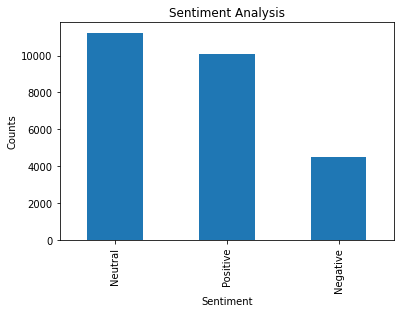

In [179]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
dfvader['VaderAnalysis'].value_counts().plot(kind = 'bar')
plt.show()

In [99]:
def _getMonthWiseCounts(trend_df):
    year_month_list = ['2020-12', '2021-01', '2021-02', '2021-03', '2021-04']
    count_df = pd.DataFrame(columns=['textblob_sentiment', 'month', 'count'])
    for year_month in year_month_list:
        trend_df_pos = trend_df.loc[trend_df['month_year']  == year_month] 
        trend_df_pos = trend_df_pos.loc[trend_df['textblob_sentiment']  == 'Positive'] 
        count_df = count_df.append({'textblob_sentiment': 'Positive', 'month': year_month,
                                   'count': len(trend_df_pos)}, ignore_index=True)

        trend_df_neg = trend_df.loc[trend_df['month_year']  == year_month] 
        trend_df_neg = trend_df_neg.loc[trend_df['textblob_sentiment']  == 'Negative']
        count_df = count_df.append({'textblob_sentiment': 'Negative', 'month': year_month,
                                   'count': len(trend_df_neg)}, ignore_index=True)

        trend_df_neu = trend_df.loc[trend_df['month_year']  == year_month] 
        trend_df_neu = trend_df_neu.loc[trend_df['textblob_sentiment']  == 'Neutral']
        count_df = count_df.append({'textblob_sentiment': 'Neutral', 'month': year_month,
                                   'count': len(trend_df_neu)}, ignore_index=True)
    
    return count_df


In [126]:
def getVaccineTypeDF(tweets_df, vaccine_name):
    res_df = pd.DataFrame(columns=tweets_df.columns, index=tweets_df.index)
    tweets_vaccine_df = tweets_df[tweets_df['hashtags'].notna()] 
    tweets_vaccine_df = tweets_vaccine_df.reset_index(drop=True)
    for i in range(0, len(tweets_vaccine_df)):
        tag = tweets_vaccine_df.hashtags.iloc[i]
        tag = (tag).replace('[', '')
        tag = (tag).replace(']', '')
        tag = (tag).replace(' ', '')
        re = list(tag.split(','))
        for j in range(0, len(re)):
            if(re[j] == vaccine_name):
                res_df.iloc[i] = (tweets_vaccine_df.iloc[i])
    res_df = res_df.dropna()
    res_df = res_df.reset_index(drop=True)

    return res_df

In [185]:
vacc_moderna_df = getVaccineTypeDF(dfvader, "'Moderna'")
vacc_pfizer_df = getVaccineTypeDF(dfvader, "'PfizerBioNTech'")
vacc_covaxin_df = getVaccineTypeDF(dfvader, "'Covaxin'")
vacc_astrazeneca_df = getVaccineTypeDF(dfvader, "'AstraZeneca'")
vacc_sputnikV_df = getVaccineTypeDF(dfvader, "'SputnikV'")

In [186]:
vacc_astrazeneca_df.head()

,text_cleaned,hashtags,date,Compound,Positive,Negative,Neutral,VaderAnalysis
0,Russian vaccine is created to last -4 years,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",2020-12-12 20:33:45,0.25,0.222,0,0.778,Positive
1,'s COVID-19 belong,"['Vaccine', 'TrumpVaccine', 'AstraZeneca', 'Pf...",2020-12-12 14:11:09,0,0,0,1,Neutral
2,WHERE IS THE PANDEMIC ?,"['PCRGATE', 'Condemic', 'BillGatesIsNotADoctor...",2020-12-14 18:08:11,0,0,0,1,Neutral
3,Good news! vaccines arrived ... other vaccines...,"['PfizerBioNTech', 'Moderna', 'AstraZeneca']",2020-12-14 03:17:15,0.69,0.363,0,0.637,Positive
4,to buy pharmaceutical firm for $39 billion,"['AstraZeneca', 'Alexion', 'COVID19vaccine', '...",2020-12-13 04:36:07,0,0,0,1,Neutral


In [187]:
def get_counts(col_name, analyzer_name, data_frame):
    count = pd.DataFrame(data_frame[col_name].value_counts())
    percentage = pd.DataFrame(data_frame[col_name].value_counts(normalize=True).mul(100))
    value_counts_df = pd.concat([count, percentage], axis = 1)
    value_counts_df = value_counts_df.reset_index()
    value_counts_df.columns = ['sentiment', 'counts', 'percentage']
    value_counts_df.sort_values('sentiment', inplace = True)
    value_counts_df['percentage'] = value_counts_df['percentage'].apply(lambda x: round(x,2))
    value_counts_df = value_counts_df.reset_index(drop = True)
    value_counts_df['analyzer'] = analyzer_name
    return value_counts_df

In [188]:
vader_sentiment_df_moderna = get_counts('VaderAnalysis','Vader', vacc_moderna_df)
vader_sentiment_df_pfizer = get_counts('VaderAnalysis','Vader', vacc_pfizer_df)
vader_sentiment_df_covaxin = get_counts('VaderAnalysis','Vader', vacc_covaxin_df)
vader_sentiment_df_astrazeneca = get_counts('VaderAnalysis','Vader', vacc_astrazeneca_df)
vader_sentiment_df_sputnikV = get_counts('VaderAnalysis','Vader', vacc_sputnikV_df)

In [189]:
def _getMonthWiseCounts(trend_df):
    year_month_list = ['2020-12', '2021-01', '2021-02', '2021-03', '2021-04']
    count_df = pd.DataFrame(columns=['VaderAnalysis', 'month', 'count'])
    for year_month in year_month_list:
        trend_df_pos = trend_df.loc[trend_df['month_year']  == year_month] 
        trend_df_pos = trend_df_pos.loc[trend_df['VaderAnalysis']  == 'Positive'] 
        count_df = count_df.append({'VaderAnalysis': 'Positive', 'month': year_month,
                                   'count': len(trend_df_pos)}, ignore_index=True)

        trend_df_neg = trend_df.loc[trend_df['month_year']  == year_month] 
        trend_df_neg = trend_df_neg.loc[trend_df['VaderAnalysis']  == 'Negative']
        count_df = count_df.append({'VaderAnalysis': 'Negative', 'month': year_month,
                                   'count': len(trend_df_neg)}, ignore_index=True)

        trend_df_neu = trend_df.loc[trend_df['month_year']  == year_month] 
        trend_df_neu = trend_df_neu.loc[trend_df['VaderAnalysis']  == 'Neutral']
        count_df = count_df.append({'VaderAnalysis': 'Neutral', 'month': year_month,
                                   'count': len(trend_df_neu)}, ignore_index=True)
    
    return count_df

In [190]:


vacc_moderna_df_sentiment_trend = vacc_moderna_df[['date', 'VaderAnalysis','Compound']]
vacc_moderna_df_sentiment_trend = vacc_moderna_df_sentiment_trend.sort_values(by='date')

vacc_pfizer_df_sentiment_trend = vacc_pfizer_df[['date', 'VaderAnalysis','Compound']]
vacc_pfizer_df_sentiment_trend = vacc_pfizer_df_sentiment_trend.sort_values(by='date')

vacc_covaxin_df_sentiment_trend = vacc_covaxin_df[['date', 'VaderAnalysis','Compound']]
vacc_covaxin_df_sentiment_trend = vacc_covaxin_df_sentiment_trend.sort_values(by='date')

vacc_astrazeneca_df_sentiment_trend = vacc_astrazeneca_df[['date','VaderAnalysis','Compound']]
vacc_astrazeneca_df_sentiment_trend = vacc_astrazeneca_df_sentiment_trend.sort_values(by='date')

vacc_sputnikV_sentiment_trend = vacc_sputnikV_df[['date','VaderAnalysis','Compound']]
vacc_sputnikV_sentiment_trend = vacc_sputnikV_sentiment_trend.sort_values(by='date')



In [192]:
vacc_moderna_df_sentiment_trend.date = pd.to_datetime(vacc_moderna_df_sentiment_trend['date'])
vacc_moderna_df_sentiment_trend['month_year'] = vacc_moderna_df_sentiment_trend['date'].dt.strftime('%Y-%m')

vacc_pfizer_df_sentiment_trend.date = pd.to_datetime(vacc_pfizer_df_sentiment_trend['date'])
vacc_pfizer_df_sentiment_trend['month_year'] = vacc_pfizer_df_sentiment_trend['date'].dt.strftime('%Y-%m')

vacc_covaxin_df_sentiment_trend.date = pd.to_datetime(vacc_covaxin_df_sentiment_trend['date'])
vacc_covaxin_df_sentiment_trend['month_year'] = vacc_covaxin_df_sentiment_trend['date'].dt.strftime('%Y-%m')

vacc_astrazeneca_df_sentiment_trend.date = pd.to_datetime(vacc_astrazeneca_df_sentiment_trend['date'])
vacc_astrazeneca_df_sentiment_trend['month_year'] = vacc_astrazeneca_df_sentiment_trend['date'].dt.strftime('%Y-%m')

vacc_sputnikV_sentiment_trend.date = pd.to_datetime(vacc_sputnikV_sentiment_trend['date'])
vacc_sputnikV_sentiment_trend['month_year'] = vacc_sputnikV_sentiment_trend['date'].dt.strftime('%Y-%m')

In [193]:
moderna_count_df = _getMonthWiseCounts(vacc_moderna_df_sentiment_trend)
pfizer_count_df = _getMonthWiseCounts(vacc_pfizer_df_sentiment_trend)
covaxin_count_df = _getMonthWiseCounts(vacc_covaxin_df_sentiment_trend)
astrazeneca_count_df = _getMonthWiseCounts(vacc_astrazeneca_df_sentiment_trend)
sputnikV_count_df = _getMonthWiseCounts(vacc_sputnikV_sentiment_trend)

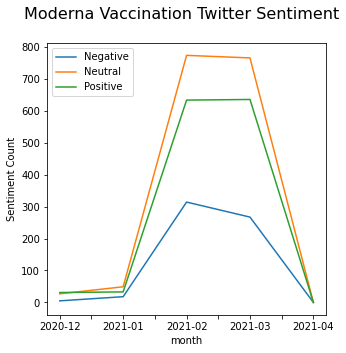

In [195]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xlabel('Month')
ax.set_ylabel('Sentiment Count')
fig.suptitle('Moderna Vaccination Twitter Sentiment', fontsize=16)
for label, grp in moderna_count_df.groupby('VaderAnalysis'):
    grp.plot(x = 'month', y = 'count',ax = ax, label = label)

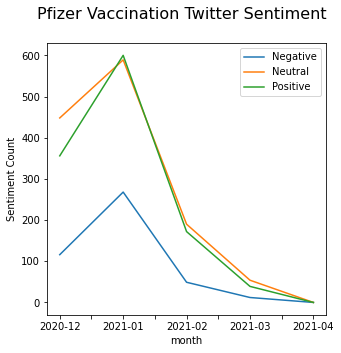

In [196]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xlabel('Month')
ax.set_ylabel('Sentiment Count')
fig.suptitle('Pfizer Vaccination Twitter Sentiment', fontsize=16)
for label, grp in pfizer_count_df.groupby('VaderAnalysis'):
    grp.plot(x = 'month', y = 'count',ax = ax, label = label)

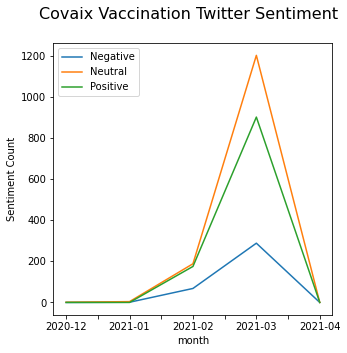

In [197]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xlabel('Month')
ax.set_ylabel('Sentiment Count')
fig.suptitle('Covaix Vaccination Twitter Sentiment', fontsize=16)
for label, grp in covaxin_count_df.groupby('VaderAnalysis'):
    grp.plot(x = 'month', y = 'count',ax = ax, label = label)

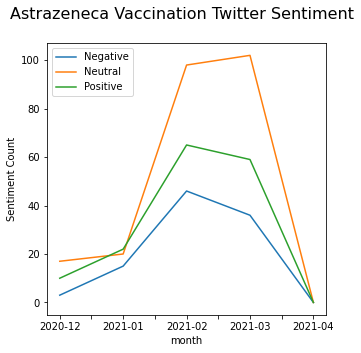

In [199]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xlabel('Month')
ax.set_ylabel('Sentiment Count')
fig.suptitle('Astrazeneca Vaccination Twitter Sentiment', fontsize=16)
for label, grp in astrazeneca_count_df.groupby('VaderAnalysis'):
    grp.plot(x = 'month', y = 'count',ax = ax, label = label)


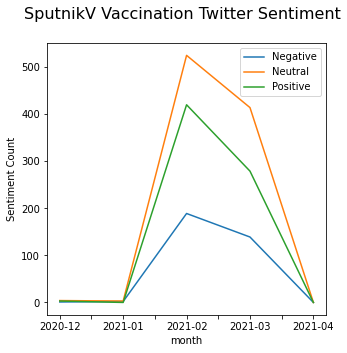

In [200]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xlabel('Month')
ax.set_ylabel('Sentiment Count')
fig.suptitle('SputnikV Vaccination Twitter Sentiment', fontsize=16)
for label, grp in sputnikV_count_df.groupby('VaderAnalysis'):
    grp.plot(x = 'month', y = 'count',ax = ax, label = label)

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Vaccine Based Sentiment of Twitter Data')

sns.set_theme(style="dark")
sns.barplot(ax=axes[0], x="sentiment", y="percentage", data=textblob_sentiment_df_moderna)
axes[0].set_title('Modern')
for index, row in textblob_sentiment_df_moderna.iterrows():
    axes[0].text(row.name,row.percentage, round(row.percentage,1), color='black', ha="center")


sns.set_theme(style="dark")
sns.barplot(ax=axes[1], x="sentiment", y="percentage", data=textblob_sentiment_df_covaxin)
axes[1].set_title('Covaxin')
for index, row in textblob_sentiment_df_covaxin.iterrows():
    axes[1].text(row.name,row.percentage, round(row.percentage,1), color='black', ha="center")

sns.set_theme(style="dark")
sns.barplot(ax=axes[2], x="sentiment", y="percentage", data=textblob_sentiment_df_sputnikV)
axes[2].set_title('SputnikV')
for index, row in textblob_sentiment_df_sputnikV.iterrows():
    axes[2].text(row.name,row.percentage, round(row.percentage,1), color='black', ha="center")

In [100]:
import os
import tensorflow
os.environ['KERAS_BACKEND'] = 'tensorflow'

import keras
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import logging
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

In [101]:
logging.basicConfig(format='%(asctime)s : %(levelname) s : %(message)s', level=logging.INFO)


In [102]:


le = preprocessing.LabelEncoder()
dfvader['Sentiment'] = le.fit_transform(dfvader['Analysis'])
dfvader['Sentiment']

0        2
1        0
2        2
3        1
4        1
        ..
25807    0
25808    2
25809    1
25810    1
25811    1
Name: Sentiment, Length: 25812, dtype: int64

In [103]:
np.unique(dfvader.Analysis)

array(['Negative', 'Neutral', 'Positive'], dtype=object)

In [104]:
dfvader.Analysis.value_counts()

Neutral     11229
Positive    10091
Negative     4492
Name: Analysis, dtype: int64

In [105]:
df_lstm = dfvader

In [106]:
df_lstm.head()

,text_cleaned,Compound,Positive,Negative,Neutral,Analysis,Sentiment
0,Same folks said daikon paste could treat a cyt...,0.4019,0.231,0.00,0.769,Positive,2
1,While the world has been on the wrong side of ...,-0.1027,0.113,0.13,0.756,Negative,0
2,Russian vaccine is created to last -4 years,0.2500,0.222,0.00,0.778,Positive,2
3,"Facts are immutable, Senator, even when you're...",0.0000,0.000,0.00,1.000,Neutral,1
4,Explain to me again why we need a vaccine,0.0000,0.000,0.00,1.000,Neutral,1


In [107]:
X_train, X_test, y_train, y_test = train_test_split(df_lstm['text_cleaned'], df_lstm['Sentiment'], test_size = 0.20, random_state = 100)
train_dataset = pd.DataFrame({'Tweet': X_train,'Sentiment': y_train})
test_dataset = pd.DataFrame({'Tweet': X_test,'Sentiment': y_test})
print("Number of positive, negative and neutral sentiment values in train set")
print(train_dataset['Sentiment'].value_counts())
print("**************************************************")
print("**************************************************")
print("NNumber of positive, negative and neutral sentiment values in test set")
print(test_dataset['Sentiment'].value_counts())

Number of positive, negative and neutral sentiment values in train set
1    8946
2    8081
0    3622
Name: Sentiment, dtype: int64
**************************************************
**************************************************
NNumber of positive, negative and neutral sentiment values in test set
1    2283
2    2010
0     870
Name: Sentiment, dtype: int64


In [108]:
tokenizer = Tokenizer(num_words = 2000, split = ' ')
tokenizer.fit_on_texts(train_dataset['Tweet'].astype(str).values)
train_tweets = tokenizer.texts_to_sequences(train_dataset['Tweet'].astype(str).values)
max_len = max([len(i) for i in train_tweets])
train_tweets = pad_sequences(train_tweets, maxlen = max_len)
test_tweets = tokenizer.texts_to_sequences(test_dataset['Tweet'].astype(str).values)
test_tweets = pad_sequences(test_tweets, maxlen = max_len)

In [109]:
model = Sequential()
model.add(Embedding(2000, 128, input_length = train_tweets.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(256, dropout = 0.2))
model.add(Dense(3, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 27, 128)           256000    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 27, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 256)               394240    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 771       
Total params: 651,011
Trainable params: 651,011
Non-trainable params: 0
_________________________________________________________________


In [110]:
history = model.fit(train_tweets, pd.get_dummies(train_dataset['Sentiment']).values, epochs = 20, batch_size = 128, validation_split = 0.2)

Epoch 1/20
130/130 [==============================] - 37s 270ms/step - loss: 0.9692 - accuracy: 0.5173 - val_loss: 0.6218 - val_accuracy: 0.7525
Epoch 2/20
130/130 [==============================] - 37s 285ms/step - loss: 0.5452 - accuracy: 0.7981 - val_loss: 0.4791 - val_accuracy: 0.8373
Epoch 3/20
130/130 [==============================] - 37s 285ms/step - loss: 0.4173 - accuracy: 0.8589 - val_loss: 0.4723 - val_accuracy: 0.8397
Epoch 4/20
130/130 [==============================] - 37s 284ms/step - loss: 0.3944 - accuracy: 0.8697 - val_loss: 0.4661 - val_accuracy: 0.8557
Epoch 5/20
130/130 [==============================] - 37s 286ms/step - loss: 0.3724 - accuracy: 0.8728 - val_loss: 0.4595 - val_accuracy: 0.8489
Epoch 6/20
130/130 [==============================] - 37s 283ms/step - loss: 0.3779 - accuracy: 0.8678 - val_loss: 0.4637 - val_accuracy: 0.8542
Epoch 7/20
130/130 [==============================] - 37s 282ms/step - loss: 0.3460 - accuracy: 0.8812 - val_loss: 0.4657 - val_ac

In [111]:
y_pred = model.predict(test_tweets)
y_pred = np.argmax(y_pred, axis=1)

In [112]:
score, accuracy = model.evaluate(test_tweets, pd.get_dummies(test_dataset['Sentiment']).values, batch_size = 128)
print("Test accuracy: {}".format(accuracy))

41/41 [==============================] - 3s 81ms/step - loss: 0.7103 - accuracy: 0.8094
Test accuracy: 0.8094131350517273


In [113]:
class_name = ['Negative', 'Neutral', 'Positive']

In [114]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred, target_names=class_name))

              precision    recall  f1-score   support

    Negative       0.66      0.59      0.62       870
     Neutral       0.84      0.88      0.86      2283
    Positive       0.83      0.83      0.83      2010

    accuracy                           0.81      5163
   macro avg       0.78      0.76      0.77      5163
weighted avg       0.81      0.81      0.81      5163



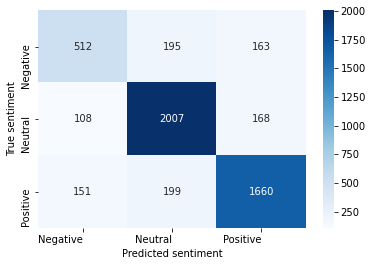

<Figure size 864x576 with 0 Axes>

In [115]:
def show_confusion_matrix(confusion_matrix):
  heatmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), ha='right')
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), ha='right')
  plt.xlabel('Predicted sentiment');
  plt.ylabel('True sentiment')
  plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, y_pred)
dfvader_cm = pd.DataFrame(cm, index=class_name, columns=class_name)
show_confusion_matrix(dfvader_cm)


In [116]:
plt.savefig('confusionmatrix_lstm.svg')


<Figure size 432x288 with 0 Axes>

In [117]:
df_lstm.head()

,text_cleaned,Compound,Positive,Negative,Neutral,Analysis,Sentiment
0,Same folks said daikon paste could treat a cyt...,0.4019,0.231,0.00,0.769,Positive,2
1,While the world has been on the wrong side of ...,-0.1027,0.113,0.13,0.756,Negative,0
2,Russian vaccine is created to last -4 years,0.2500,0.222,0.00,0.778,Positive,2
3,"Facts are immutable, Senator, even when you're...",0.0000,0.000,0.00,1.000,Neutral,1
4,Explain to me again why we need a vaccine,0.0000,0.000,0.00,1.000,Neutral,1


In [118]:
pd.set_option("display.max_columns", 100)
print(df_lstm)

                                            text_cleaned  Compound  Positive  \
0      Same folks said daikon paste could treat a cyt...    0.4019     0.231   
1      While the world has been on the wrong side of ...   -0.1027     0.113   
2            Russian vaccine is created to last -4 years    0.2500     0.222   
3      Facts are immutable, Senator, even when you're...    0.0000     0.000   
4              Explain to me again why we need a vaccine    0.0000     0.000   
...                                                  ...       ...       ...   
25807  The same Anthony Fauci who questioned just a f...   -0.1531     0.000   
25808  If you want to know how much antivaxx disinfor...    0.0772     0.064   
25809  Venezuelan President Maduro Gets First Dose of...    0.0000     0.000   
25810  Anthony Fauci, Director of NIAID , Chief Medic...    0.0000     0.000   
25811       Of course Black (spits) never mentions - the    0.0000     0.000   

       Negative  Neutral  Analysis  Sen

In [119]:
from wordcloud import WordCloud, STOPWORDS

In [120]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [121]:
from wordcloud import WordCloud, STOPWORDS
def show_wordcloud(data, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,background_color="black").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

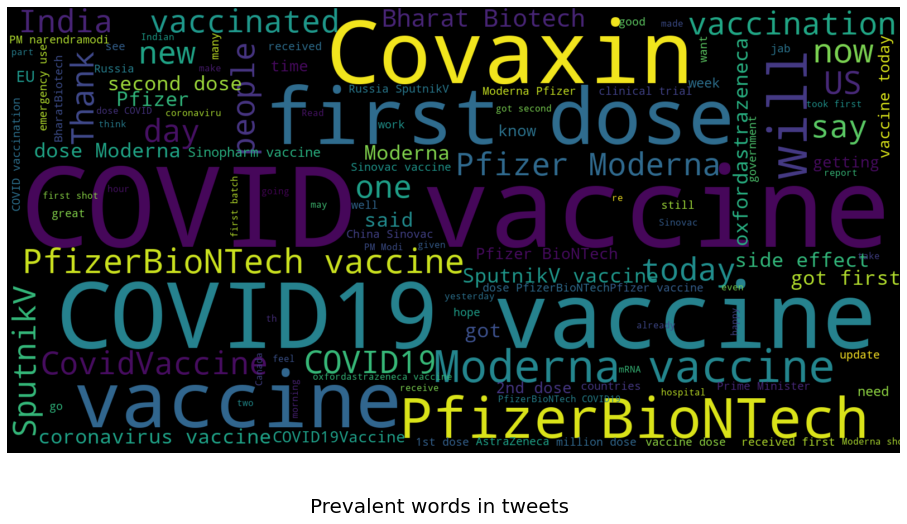

In [122]:
show_wordcloud(tweets_df_final['text'], title = 'Prevalent words in tweets')

In [123]:
def plot_features_distribution(features, title, df, isLog=False):
    plt.figure(figsize=(12,6))
    plt.title(title)
    for feature in features:
        if(isLog):
            sns.distplot(np.log1p(df[feature]),kde=True,hist=False, bins=120, label=feature)
        else:
            sns.distplot(df[feature],kde=True,hist=False, bins=120, label=feature)
    plt.xlabel('')
    plt.legend()
    plt.show()


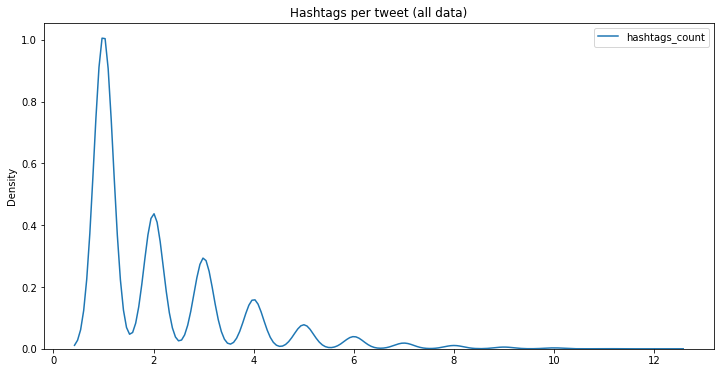

In [124]:
tweets_df_final['hashtags'] = tweets_df_final['hashtags'].replace(np.nan, "['None']", regex=True)
tweets_df_final['hashtags'] = tweets_df_final['hashtags'].apply(lambda x: x.replace('\\N',''))
tweets_df_final['hashtags_count'] = tweets_df_final['hashtags'].apply(lambda x: len(x.split(',')))
plot_features_distribution(['hashtags_count'], 'Hashtags per tweet (all data)', tweets_df_final)